In [1]:
# Import the required modules
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Kernel Function
# Currently only RBF kernel is implemented.
def kernel_fn(x1, x2, kernel_type="RBF", sigma_f=1.27, sigma_n=.3, l=1):
    if kernel_type == "RBF":
        '''
        Sanity Check - kernel_fn(2, 2) = 1.27*1.27 + .3*.3 ~ 1.7
        '''
        return sigma_f**2 * np.exp(-(x1 - x2)**2/(2*l**2)) + (x1==x2)*sigma_n**2

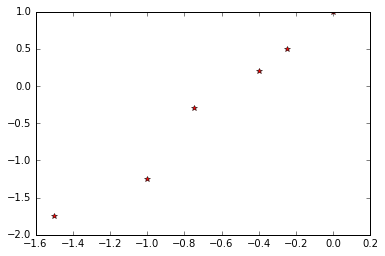

In [3]:
# Training set 
x = np.array([-1.50, -1.00, -0.75, -0.40, -0.25, 0.00], dtype=np.double)
y = np.array([[-1.75, -1.25, -.30, .20, .50, 1]], dtype=np.double)
plt.plot(x.ravel(), y.ravel(), "r*")

In [4]:
# Prepare the K Matrix
K = np.zeros(shape=(x.shape[0],x.shape[0]), dtype=np.double)

# Fill in the K Matrix
for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        K[i][j] = kernel_fn(x[i], x[j])

In [5]:
# Test Data
# x_star = np.array([0.20, -1.2, -.6], dtype=np.double)
x_star = np.linspace(-2.5, 1, 100)

# Prepare the K Matrix
K_star = np.zeros(shape=(x_star.shape[0],x.shape[0]), dtype=np.double)
K_star_star = np.zeros(shape=(x_star.shape[0],x_star.shape[0]), dtype=np.double)

# Fill in the K_star matrix
for i in range(K_star.shape[0]):
    for j in range(K_star.shape[1]):
        K_star[i][j] = kernel_fn(x_star[i], x[j])

# Fill in the K_star_star matrix
for i in range(K_star_star.shape[0]):
    for j in range(K_star_star.shape[1]):
        K_star_star[i][j] = kernel_fn(x_star[i], x_star[j])

In [6]:
# Compute the predictions with their variances.
exp_y_pred = np.dot(np.dot(K_star, np.linalg.inv(K)), y.T)
var_y_pred = K_star_star - np.dot(np.dot(K_star, np.linalg.inv(K)), K_star.T)
#print("Expected Value of y-star = {} with co-variance = {}".format(exp_y_pred, var_y_pred))

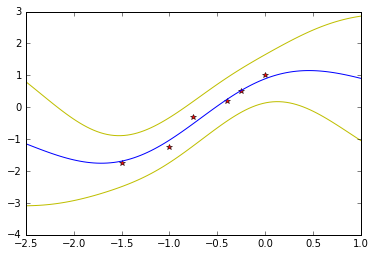

In [7]:
# Show the predictions, along with the variances.
plt.plot(x.ravel(), y.ravel(), "r*")
plt.plot(x_star.ravel(), exp_y_pred.ravel(), "b")
plt.plot(x_star.ravel(), exp_y_pred.ravel() - 2*np.sqrt(np.diag(var_y_pred)), "y")
plt.plot(x_star.ravel(), exp_y_pred.ravel() + 2*np.sqrt(np.diag(var_y_pred)), "y")